## Extract meme text from the image

In [3]:
# load reddit metadata

import pandas as pd

meme_df = pd.read_json('../data/memesfinal.json')
meme_df['filetype'] = meme_df.url.apply(lambda x: x.split('.')[-1])
meme_df['filetype'] = meme_df['filetype'].apply(lambda x: x if len(x) <= 4 else 'jpg')
meme_df['filename'] = meme_df['id'] + '.' + meme_df['filetype']
meme_df.head()

,Unnamed: 0.1,Unnamed: 0,id,title,text,score,num_comments,over18,url,date,IDURL,filetype,filename_x,filename_y,vgg_objs,vgg_probs,filename
0,0,612615,2021.02.15_288,Wait I didn't mean it like that,None,211152,1642,False,https://i.redd.it/n4ildkpurph61.png,2021-02-15,Wait I didn't mean it like thathttps://i.redd....,png,2021.02.15_288.png,"[[[n06359193, web_site, 0.6105720997], [n02841...","[web_site, binoculars, comic_book, book_jacket...","[0.6105720997, 0.0365490019, 0.025503724800000...",2021.02.15_288.png
1,1,545780,2020.10.20_959,Don't be mad,None,207206,811,False,https://i.redd.it/gsqgq6uwuau51.jpg,2020-10-20,Don't be madhttps://i.redd.it/gsqgq6uwuau51.jpg,jpg,2020.10.20_959.jpg,"[[[n06359193, web_site, 0.5064607263], [n03782...","[web_site, monitor, white_wolf, screen, televi...","[0.5064607263, 0.1039560139, 0.1010734811, 0.0...",2020.10.20_959.jpg
2,2,385925,2020.01.18_675,For real tho,None,207066,1734,False,https://i.redd.it/eg4t9kvlplb41.jpg,2020-01-18,For real thohttps://i.redd.it/eg4t9kvlplb41.jpg,jpg,2020.01.18_675.jpg,"[[[n02730930, apron, 0.23828053470000002], [n0...","[apron, backpack, envelope, pillow, comic_book]","[0.23828053470000002, 0.1158946604, 0.06027054...",2020.01.18_675.jpg
3,3,468558,2020.06.09_755,Right as rain after that,None,187936,743,False,https://i.redd.it/1wniz8ionv351.jpg,2020-06-09,Right as rain after thathttps://i.redd.it/1wni...,jpg,2020.06.09_755.jpg,"[[[n06359193, web_site, 0.26609888670000004], ...","[web_site, envelope, rule, sewing_machine, desk]","[0.26609888670000004, 0.12914824490000001, 0.1...",2020.06.09_755.jpg
4,4,485415,2020.07.08_336,Licensed Dad Joke,None,182056,616,False,https://i.redd.it/nrj9smsfek951.jpg,2020-07-08,Licensed Dad Jokehttps://i.redd.it/nrj9smsfek9...,jpg,2020.07.08_336.jpg,"[[[n02114548, white_wolf, 0.6159376502], [n021...","[white_wolf, Samoyed, chow, ice_bear, Arctic_fox]","[0.6159376502, 0.2730476558, 0.0343475901, 0.0...",2020.07.08_336.jpg


## Using pytesseract
Tutorial Link: https://towardsdatascience.com/read-text-from-image-with-one-line-of-python-code-c22ede074cac

In [4]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

In [5]:
filename = meme_df.at[0,'filename']
filepath = '../data/Memes2022Final2/' + filename
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe" # r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
img = cv2.imread(filepath)
text = pytesseract.image_to_string(img)
print(text)

High schooler: I'd kill for
college tuition
US military recruiters:

u/beakf
You will?



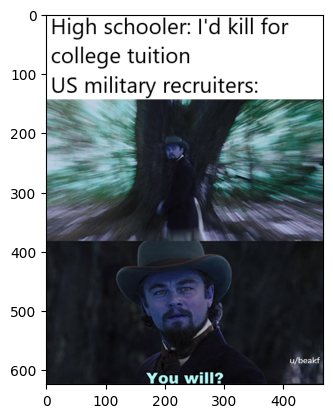

In [8]:
# test: no text, text, couldn't open
filename = meme_df.at[0,'filename']
path_to_file = '../data/Memes2022Final2/' + filename
img = cv2.imread(path_to_file)
image = cv2.imread(path_to_file, cv2.IMREAD_GRAYSCALE) 
cv2.dilate(image, (5, 5), image)
plt.imshow(img)
plt.show()

In [9]:
# as a function
def get_meme_text(filename):
    try:
        path_to_file = '../data/Memes2022Final2/' + filename
        image = cv2.imread(path_to_file, cv2.IMREAD_GRAYSCALE) 
        cv2.dilate(image, (5, 5), image)
        text = pytesseract.image_to_string(image)
    except:
        text = 'ERROR'
    return text

In [10]:
# test function
meme_texts = []

for i in range(0,5):
    filename = meme_df.at[i, 'filename']
    text = get_meme_text(filename)
    meme_texts.append(text)

meme_texts

["High schooler: I'd kill for\ncollege tuition\nUS military recruiters:\n\nIt\n\nu/beakf\nYou will?\n",
 "@ renk. 5\n@ 1 Award\n\nI'm a dude, and | fucking hate when people tell me | look tired or\nangry. Like, I'm just standing here. What the fuck?\n\nReply ® 8.1k\n\n6 ee.\nB © A @ 6 Awards\n\nYou sound angry.\n\n# 77k «\n\n@ Wee sh\n%& © & 4 awards\n\n| bet it's because he's tired.\n\n",
 '',
 '— :\nMy stomach hurts __ B »\n\n/@\nIt’s probably ghosts 4>\n\n»\n} @\nris\nws\nAnyways, here’s your\nprescription cae\ngo } ®\nsm\na\n\n',
 'Dads telling jokes at home\n\nDads cling es a work “et\n']

In [11]:
# process 10000 rows at a time and save data

import swifter
start = 310000

for i in range(0,700):
    end = start + 10000
    meme_df = meme_df[start:end]
    df_with_meme_text = meme_df.filename.swifter.apply(lambda row: get_meme_text(row) if (pd.notnull(row)) else row)
    #save data
    df_with_meme_text = pd.DataFrame(df_with_meme_text)
    df_with_meme_text['id'] = meme_df['id']
    save_filename = 'meme_text_' + str(start) + '_' + str(end) + '.json'
    df_with_meme_text.to_json(save_filename)
    #reload data
    meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")
    #change start
    start = end
    print(start)
    i+=1

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


311000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


312000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


313000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


314000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


315000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


316000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


317000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


318000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


319000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


320000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


321000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


322000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


323000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


324000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


325000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


326000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


327000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


328000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


329000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


330000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


331000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


332000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


333000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


334000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


335000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


336000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


337000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


338000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


339000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


340000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


341000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


342000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


343000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


344000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


345000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


346000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


347000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


348000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


349000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


350000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


351000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


352000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


353000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


354000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


355000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


356000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


357000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


358000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


359000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


360000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


361000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


362000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


363000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


364000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


365000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


366000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


367000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


368000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


369000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


370000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


371000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


372000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


373000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


374000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


375000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


376000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


377000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


378000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


379000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


380000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


381000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


382000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


383000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


384000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


385000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


386000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


387000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


388000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


389000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


390000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


391000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


392000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


393000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


394000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


395000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


396000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


397000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


398000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


399000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


400000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


401000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


402000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


403000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


404000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


405000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


406000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


407000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


408000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


409000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


410000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


411000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


412000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


413000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


414000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


415000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


416000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


417000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


418000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


419000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


420000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


421000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


422000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


423000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


424000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


425000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


426000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


427000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


428000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


429000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


430000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


431000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


432000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


433000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


434000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


435000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


436000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


437000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


438000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


439000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


440000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


441000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


442000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


443000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


444000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


445000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


446000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


447000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


448000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


449000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


450000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


451000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


452000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


453000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


454000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


455000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


456000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


457000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


458000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


459000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


460000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


461000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


462000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


463000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


464000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


465000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


466000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


467000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


468000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


469000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


470000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


471000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


472000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


473000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


474000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


475000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


476000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


477000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


478000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


479000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


480000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


481000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


482000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


483000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


484000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


485000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


486000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


487000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


488000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


489000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


490000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


491000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


492000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


493000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


494000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


495000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


496000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


497000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


498000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


499000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


500000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


501000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


502000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


503000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


504000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


505000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


506000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


507000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


508000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


509000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


510000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


511000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


512000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


513000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


514000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


515000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


516000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


517000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


518000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


519000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


520000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


521000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


522000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


523000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


524000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


525000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


526000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


527000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


528000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


529000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


530000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


531000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


532000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


533000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


534000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


535000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


536000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


537000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


538000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


539000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


540000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


541000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


542000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


543000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


544000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


545000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


546000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


547000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


548000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


549000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


550000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


551000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


552000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


553000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


554000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


555000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


556000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


557000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


558000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


559000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


560000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


561000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


562000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


563000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


564000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


565000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


566000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


567000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


568000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


569000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


570000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


571000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


572000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


573000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


574000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


575000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


576000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


577000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


578000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


579000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


580000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


581000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


582000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


583000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


584000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


585000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


586000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


587000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


588000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


589000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


590000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


591000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


592000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


593000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


594000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


595000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


596000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


597000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


598000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


599000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


600000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


601000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


602000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


603000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


604000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


605000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


606000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


607000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


608000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


609000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


610000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


611000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


612000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


613000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


614000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


615000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


616000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


617000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


618000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


619000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


620000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


621000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


622000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


623000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


624000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


625000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


626000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


627000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


628000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


629000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


630000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


631000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


632000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


633000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


634000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


635000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


636000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


637000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


638000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


639000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


640000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


641000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


642000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


643000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


644000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


645000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


646000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


647000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


648000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


649000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


650000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


651000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


652000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


653000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


654000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


655000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


656000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


657000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


658000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


659000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


660000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


661000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


662000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


663000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


664000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


665000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


666000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


667000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


668000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


669000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


670000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


671000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


672000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


673000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


674000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


675000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


676000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


677000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


678000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


679000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


680000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


681000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


682000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


683000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


684000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


685000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


686000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


687000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


688000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


689000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


690000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


691000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


692000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


693000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


694000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


695000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


696000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


697000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


698000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


699000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


700000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


701000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


702000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


703000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


704000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


705000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


706000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


707000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


708000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


709000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


710000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


711000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


712000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


713000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


714000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


715000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


716000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


717000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


718000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


719000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


720000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


721000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


722000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


723000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


724000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


725000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


726000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


727000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


728000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


729000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


730000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


731000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


732000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


733000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


734000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


735000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


736000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


737000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


738000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


739000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


740000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


741000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


742000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


743000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


744000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


745000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


746000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


747000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


748000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


749000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


750000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


751000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


752000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


753000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


754000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


755000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


756000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


757000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


758000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


759000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


760000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


761000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


762000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


763000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


764000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


765000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


766000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


767000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


768000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


769000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


770000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


771000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


772000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


773000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


774000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


775000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


776000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


777000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


778000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


779000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


780000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


781000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


782000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


783000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


784000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


785000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


786000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


787000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


788000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


789000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


790000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


791000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


792000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


793000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


794000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


795000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


796000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


797000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


798000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


799000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


800000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


801000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


802000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


803000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


804000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


805000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


806000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


807000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


808000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


809000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


810000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


811000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


812000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


813000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


814000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


815000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


816000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


817000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


818000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


819000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


820000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


821000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


822000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


823000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


824000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


825000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


826000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


827000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


828000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


829000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


830000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


831000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


832000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


833000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


834000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


835000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


836000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


837000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


838000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


839000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


840000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


841000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


842000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


843000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


844000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


845000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


846000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


847000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


848000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


849000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


850000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


851000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


852000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


853000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


854000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


855000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


856000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


857000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


858000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


859000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


860000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


861000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


862000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


863000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


864000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


865000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


866000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


867000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


868000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


869000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


870000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


871000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


872000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


873000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


874000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


875000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


876000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


877000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


878000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


879000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


880000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


881000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


882000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


883000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


884000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


885000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


886000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


887000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


888000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


889000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


890000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


891000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


892000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


893000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


894000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


895000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


896000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


897000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


898000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


899000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


900000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


901000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


902000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


903000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


904000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


905000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


906000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


907000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


908000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


909000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


910000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


911000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


912000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


913000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


914000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


915000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


916000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


917000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


918000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


919000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


920000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


921000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


922000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


923000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


924000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


925000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


926000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


927000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


928000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


929000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


930000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


931000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


932000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


933000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


934000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


935000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


936000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


937000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


938000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


939000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


940000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


941000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


942000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


943000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


944000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


945000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


946000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


947000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


948000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


949000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


950000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


951000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


952000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


953000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


954000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


955000


Pandas Apply:   0%|          | 0/149 [00:00<?, ?it/s]

C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


956000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


957000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


958000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


959000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


960000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


961000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


962000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


963000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


964000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


965000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


966000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


967000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


968000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


969000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


970000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


971000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


972000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


973000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


974000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


975000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


976000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


977000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


978000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


979000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


980000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


981000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


982000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


983000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


984000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


985000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


986000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


987000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


988000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


989000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


990000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


991000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


992000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


993000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


994000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


995000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


996000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


997000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


998000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


999000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1000000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1001000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1002000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1003000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1004000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1005000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1006000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1007000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1008000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1009000


C:\Users\HSDSLab-admin\AppData\Local\Temp\ipykernel_10752\1432736722.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('../data/memesfinal.csv', delimiter = ",")


1010000


In [25]:
# this is what the saved dataframes look like

df_with_meme_text.head()

,filename,id
65000,When the barber is cutting your\nhair shorter ...,2018.11.21_637
65001,he small\n\nbut most importantly\n,2018.06.30_334
65002,as a\n\nTO DETECT SARCASM)\n\n,2018.12.01_599
65003,Know the difference between\n\nGood suce Bad z...,2018.04.11_313
65004,When you buy some high end\nheadphones and sta...,2022.07.29_888
